# Rate Bird clusters

In [1]:
import os
import numpy as np
import torch
import pandas as pd
import matplotlib.patches as mpatches

import matplotlib.pyplot as plt

In [2]:
dpath='/grand/projects/BirdAudio/Soundscapes/Complete_Data/'
if os.path.isfile(os.path.join(dpath, 'Data.csv')):
    print('Data already exists, loading it...')
    data = pd.read_csv(os.path.join(dpath, 'Data.csv'))
    print('Done!')
else:
    print('No Data.csv file')

data

Data already exists, loading it...
Done!


Unnamed: 0         detection  confidence  year  month  day  hour  \
0                 0      No detection    1.000000  2021      6   28    17   
1                 1      No detection    1.000000  2021      6   28    17   
2                 2  Hairy Woodpecker    0.280230  2021      6   28    17   
3                 3  Downy Woodpecker    0.126071  2021      6   28    17   
4                 4      No detection    1.000000  2021      6   28    17   
...             ...               ...         ...   ...    ...  ...   ...   
2456607     2456607          Blue Jay    0.221711  2021      7   22    16   
2456608     2456608          Blue Jay    0.107609  2021      7   22    16   
2456609     2456609      No detection    1.000000  2021      7   22    16   
2456610     2456610      No detection    1.000000  2021      7   22    16   
2456611     2456611      No detection    1.000000  2021      7   22    16   

         minute  second  week  weekday  device   set  \
0             0       0    26        1   23771  set1   
1             0       9    26        1   23771  set1   
2             1      30    26        1   23771  set1   
3             1      30    26        1   23771  set1   
4            15       0    26        1   23771  set1   
...         ...     ...   ...      ...     ...   ...   
2456607      54      45    29        4   23795  set2   
2456608      54      54    29        4   23795  set2   
2456609      55       3    29        4   23795  set2   
2456610      55      12    29        4   23795  set2   
2456611      55      21    29        4   23795  set2   

                                                     paths         x  \
0        set1/00023771/20210628_STUDY/20210628T170000-0... -1.314544   
1        set1/00023771/20210628_STUDY/20210628T170000-0... -1.477438   
2        set1/00023771/20210628_STUDY/20210628T170000-0... -3.349682   
3        set1/00023771/20210628_STUDY/20210628T170000-0... -3.349682   
4        set1/00023771/20210628_STUDY/20210628T170000-0... -2.395481   
...                                                    ...       ...   
2456607  set2/00023795/20210722_STUDY/20210722T164030-0... -3.294346   
2456608  set2/00023795/20210722_STUDY/20210722T164030-0... -3.402299   
2456609  set2/00023795/20210722_STUDY/20210722T164030-0... -3.009493   
2456610  set2/00023795/20210722_STUDY/20210722T164030-0... -3.477466   
2456611  set2/00023795/20210722_STUDY/20210722T164030-0... -0.224945   

                y  labels  
0        2.506662      68  
1        5.518093      49  
2        5.888462      90  
3        5.888462      90  
4        3.372900      47  
...           ...     ...  
2456607  1.410931      37  
2456608  2.353246      37  
2456609  4.178609      47  
2456610  5.271054      90  
2456611 -4.289754      31  

[2456612 rows x 17 columns]

Text(0.5, 1.0, 'Bird detections')

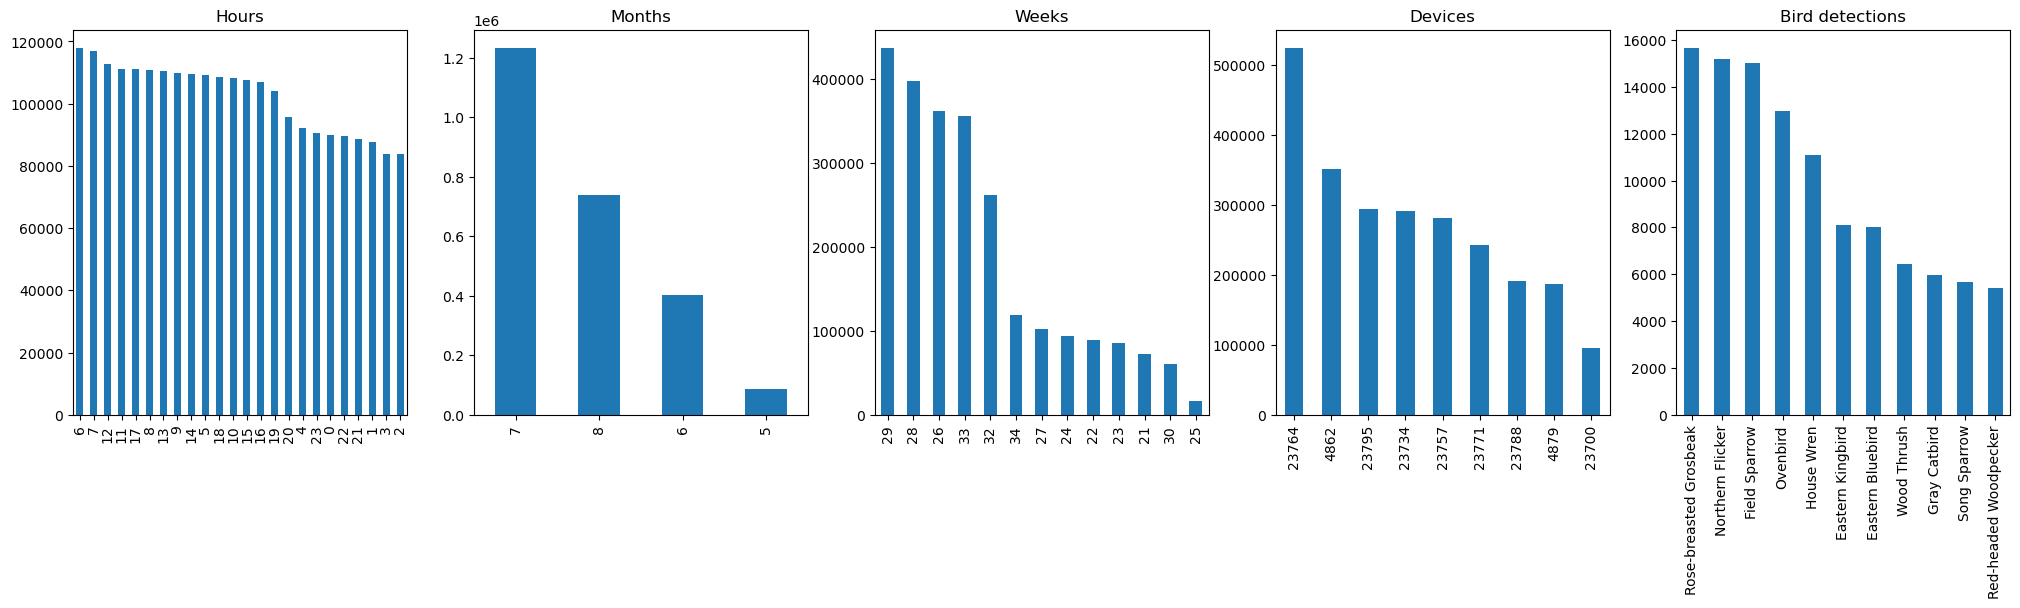

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
#df.labels.value_counts()[0:10].plot.bar(ax=axes[0])
data.hour.value_counts().plot.bar(ax=axes[0])
data.month.value_counts().plot.bar(ax=axes[1])
data.week.value_counts().plot.bar(ax=axes[2])
data.device.value_counts().plot.bar(ax=axes[3])
data.detection.value_counts()[20:31].plot.bar(ax=axes[4])

axes[0].set_title("Hours")
axes[1].set_title("Months")
axes[2].set_title("Weeks")
axes[3].set_title("Devices")
axes[4].set_title("Bird detections")


In [3]:
clusters=np.unique(data['labels'])
bird_rate_clusters=[]
for cluster in clusters:
    aux={}
    cluster_data=data[data['labels']==cluster]
    bird_detection_rate=cluster_data[cluster_data['detection']!='No detection'].shape[0]/cluster_data.shape[0]
    aux['cluster']=cluster
    aux['bird_detection_rate']=bird_detection_rate
    bird_rate_clusters.append(aux)
    
bird_rate_clusters = pd.DataFrame(data=bird_rate_clusters)
bird_rate_clusters

cluster  bird_detection_rate
0         0             0.294481
1         1             0.336994
2         2             0.081762
3         3             0.686408
4         4             0.558243
..      ...                  ...
95       95             0.579594
96       96             0.436075
97       97             0.436228
98       98             0.741366
99       99             0.740901

[100 rows x 2 columns]

<AxesSubplot: >

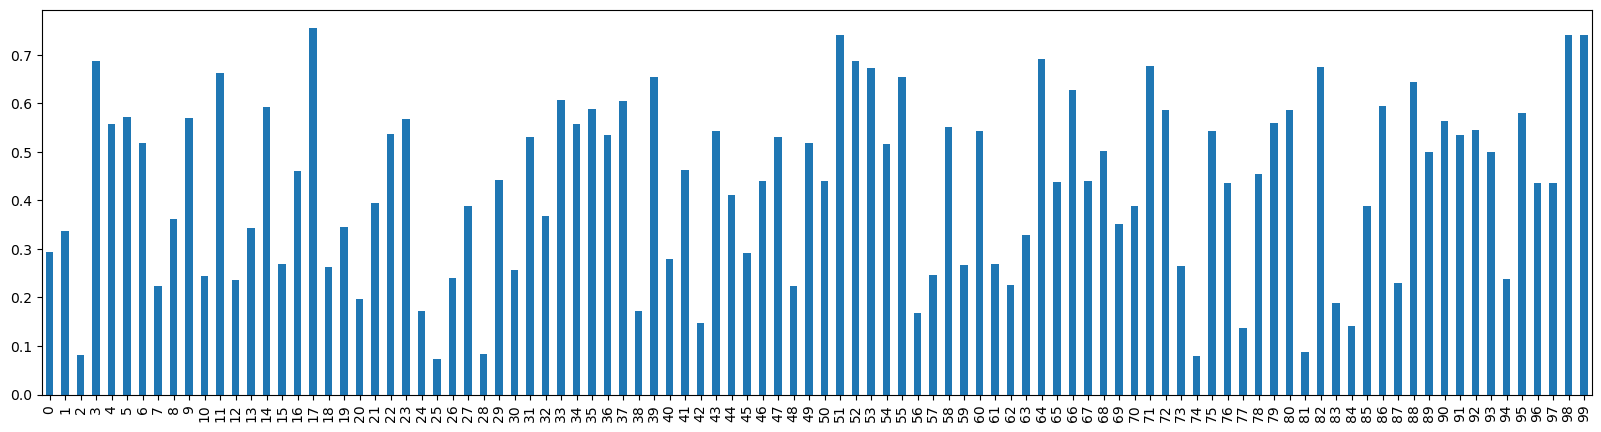

In [4]:
bird_rate_clusters['bird_detection_rate'].plot.bar(figsize=(20,5))

In [5]:
bird_rate_clusters[bird_rate_clusters['bird_detection_rate']>0.7]

cluster  bird_detection_rate
17       17             0.755666
51       51             0.740867
98       98             0.741366
99       99             0.740901

Cluster  0
Bird detection rate  0.294480755265069
Cluster  2
Bird detection rate  0.08176247719724963
Cluster  7
Bird detection rate  0.2246066474257518
Cluster  10
Bird detection rate  0.2451686577652846
Cluster  12
Bird detection rate  0.2353909465020576
Cluster  15
Bird detection rate  0.269193201797226
Cluster  18
Bird detection rate  0.2629450985955455
Cluster  20
Bird detection rate  0.1967479674796748
Cluster  24
Bird detection rate  0.17122399211331915
Cluster  25
Bird detection rate  0.07301671530910056
Cluster  26
Bird detection rate  0.23997829232995657
Cluster  28
Bird detection rate  0.08268853216306733
Cluster  30
Bird detection rate  0.25653706529173465
Cluster  38
Bird detection rate  0.17290182106096597
Cluster  40
Bird detection rate  0.27980635102978585
Cluster  42
Bird detection rate  0.1467232823451169
Cluster  45
Bird detection rate  0.29211251072283173
Cluster  48
Bird detection rate  0.2235313640889479
Cluster  56
Bird detection rate  0.16808404202101052
Cluster

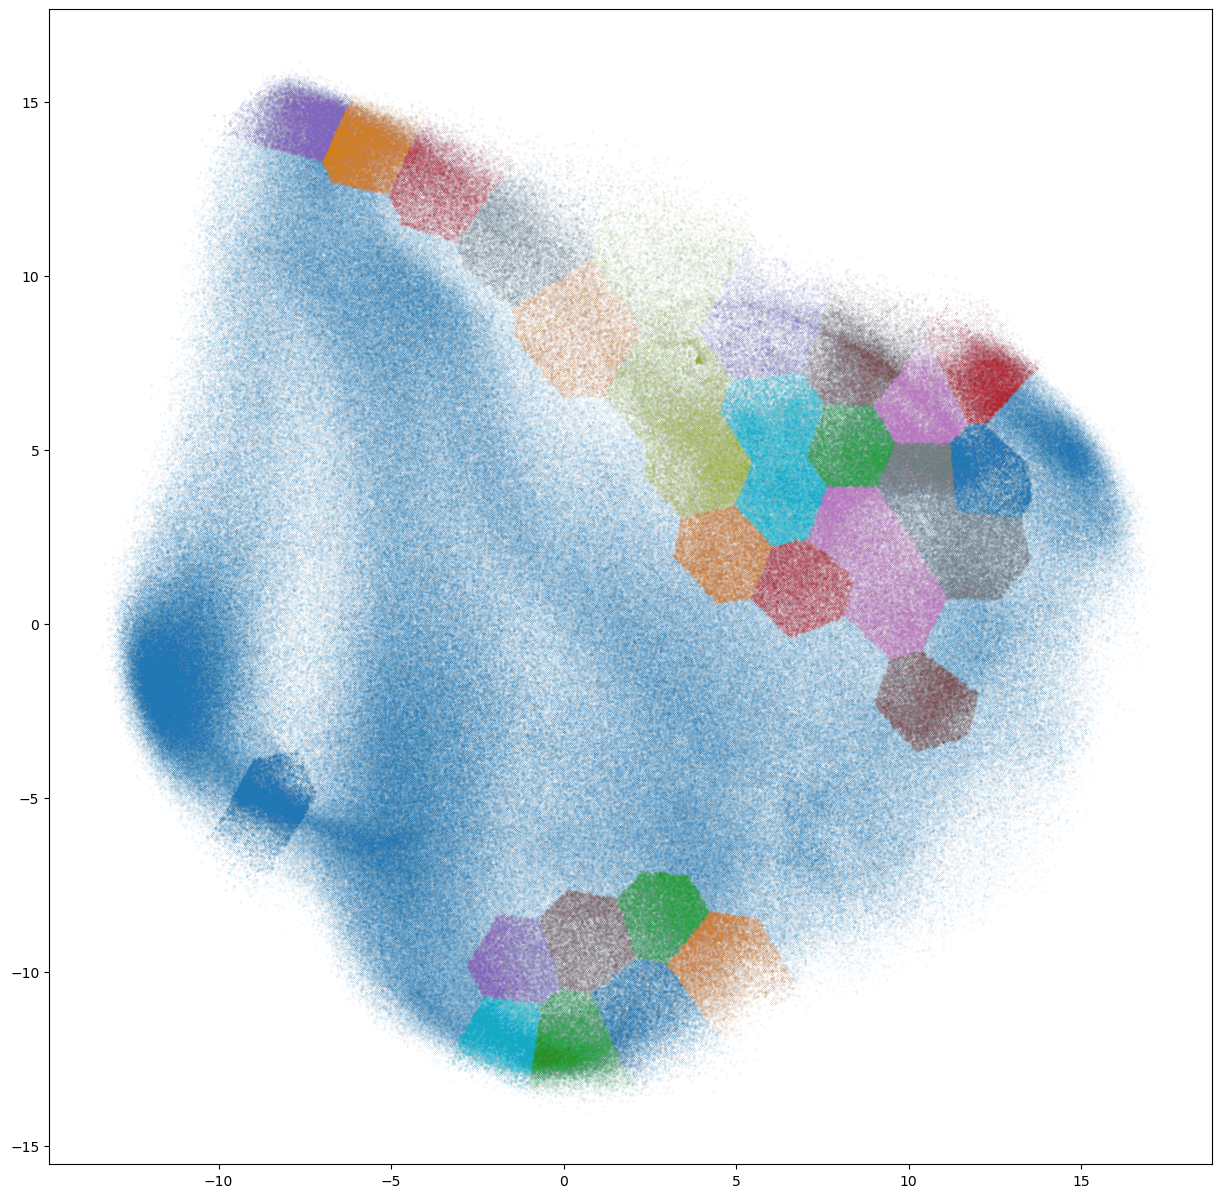

In [34]:
# Black removed and is used for noise instead.
label_predictions=data['labels']
core_samples = np.zeros_like(label_predictions, dtype=bool)
core_samples[label_predictions != -1] = True
unique_labels = set(label_predictions)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.scatter(data['x'],
           data['y'],
           s=0.0006
          )

relevant_clusters=[]
for k in clusters:
    bird_rate=bird_rate_clusters['bird_detection_rate'][k]

    class_member_mask = label_predictions == k
    #class_member_mask = labels == k
    #if bird_rate>0.6:
    if bird_rate<0.3:
        relevant_clusters.append(k)
        print('Cluster ', k)
        print('Bird detection rate ', bird_rate)
        ax.scatter(data[data['labels']==k]['x'],
                   data[data['labels']==k]['y'],
                   s=0.001
                  )



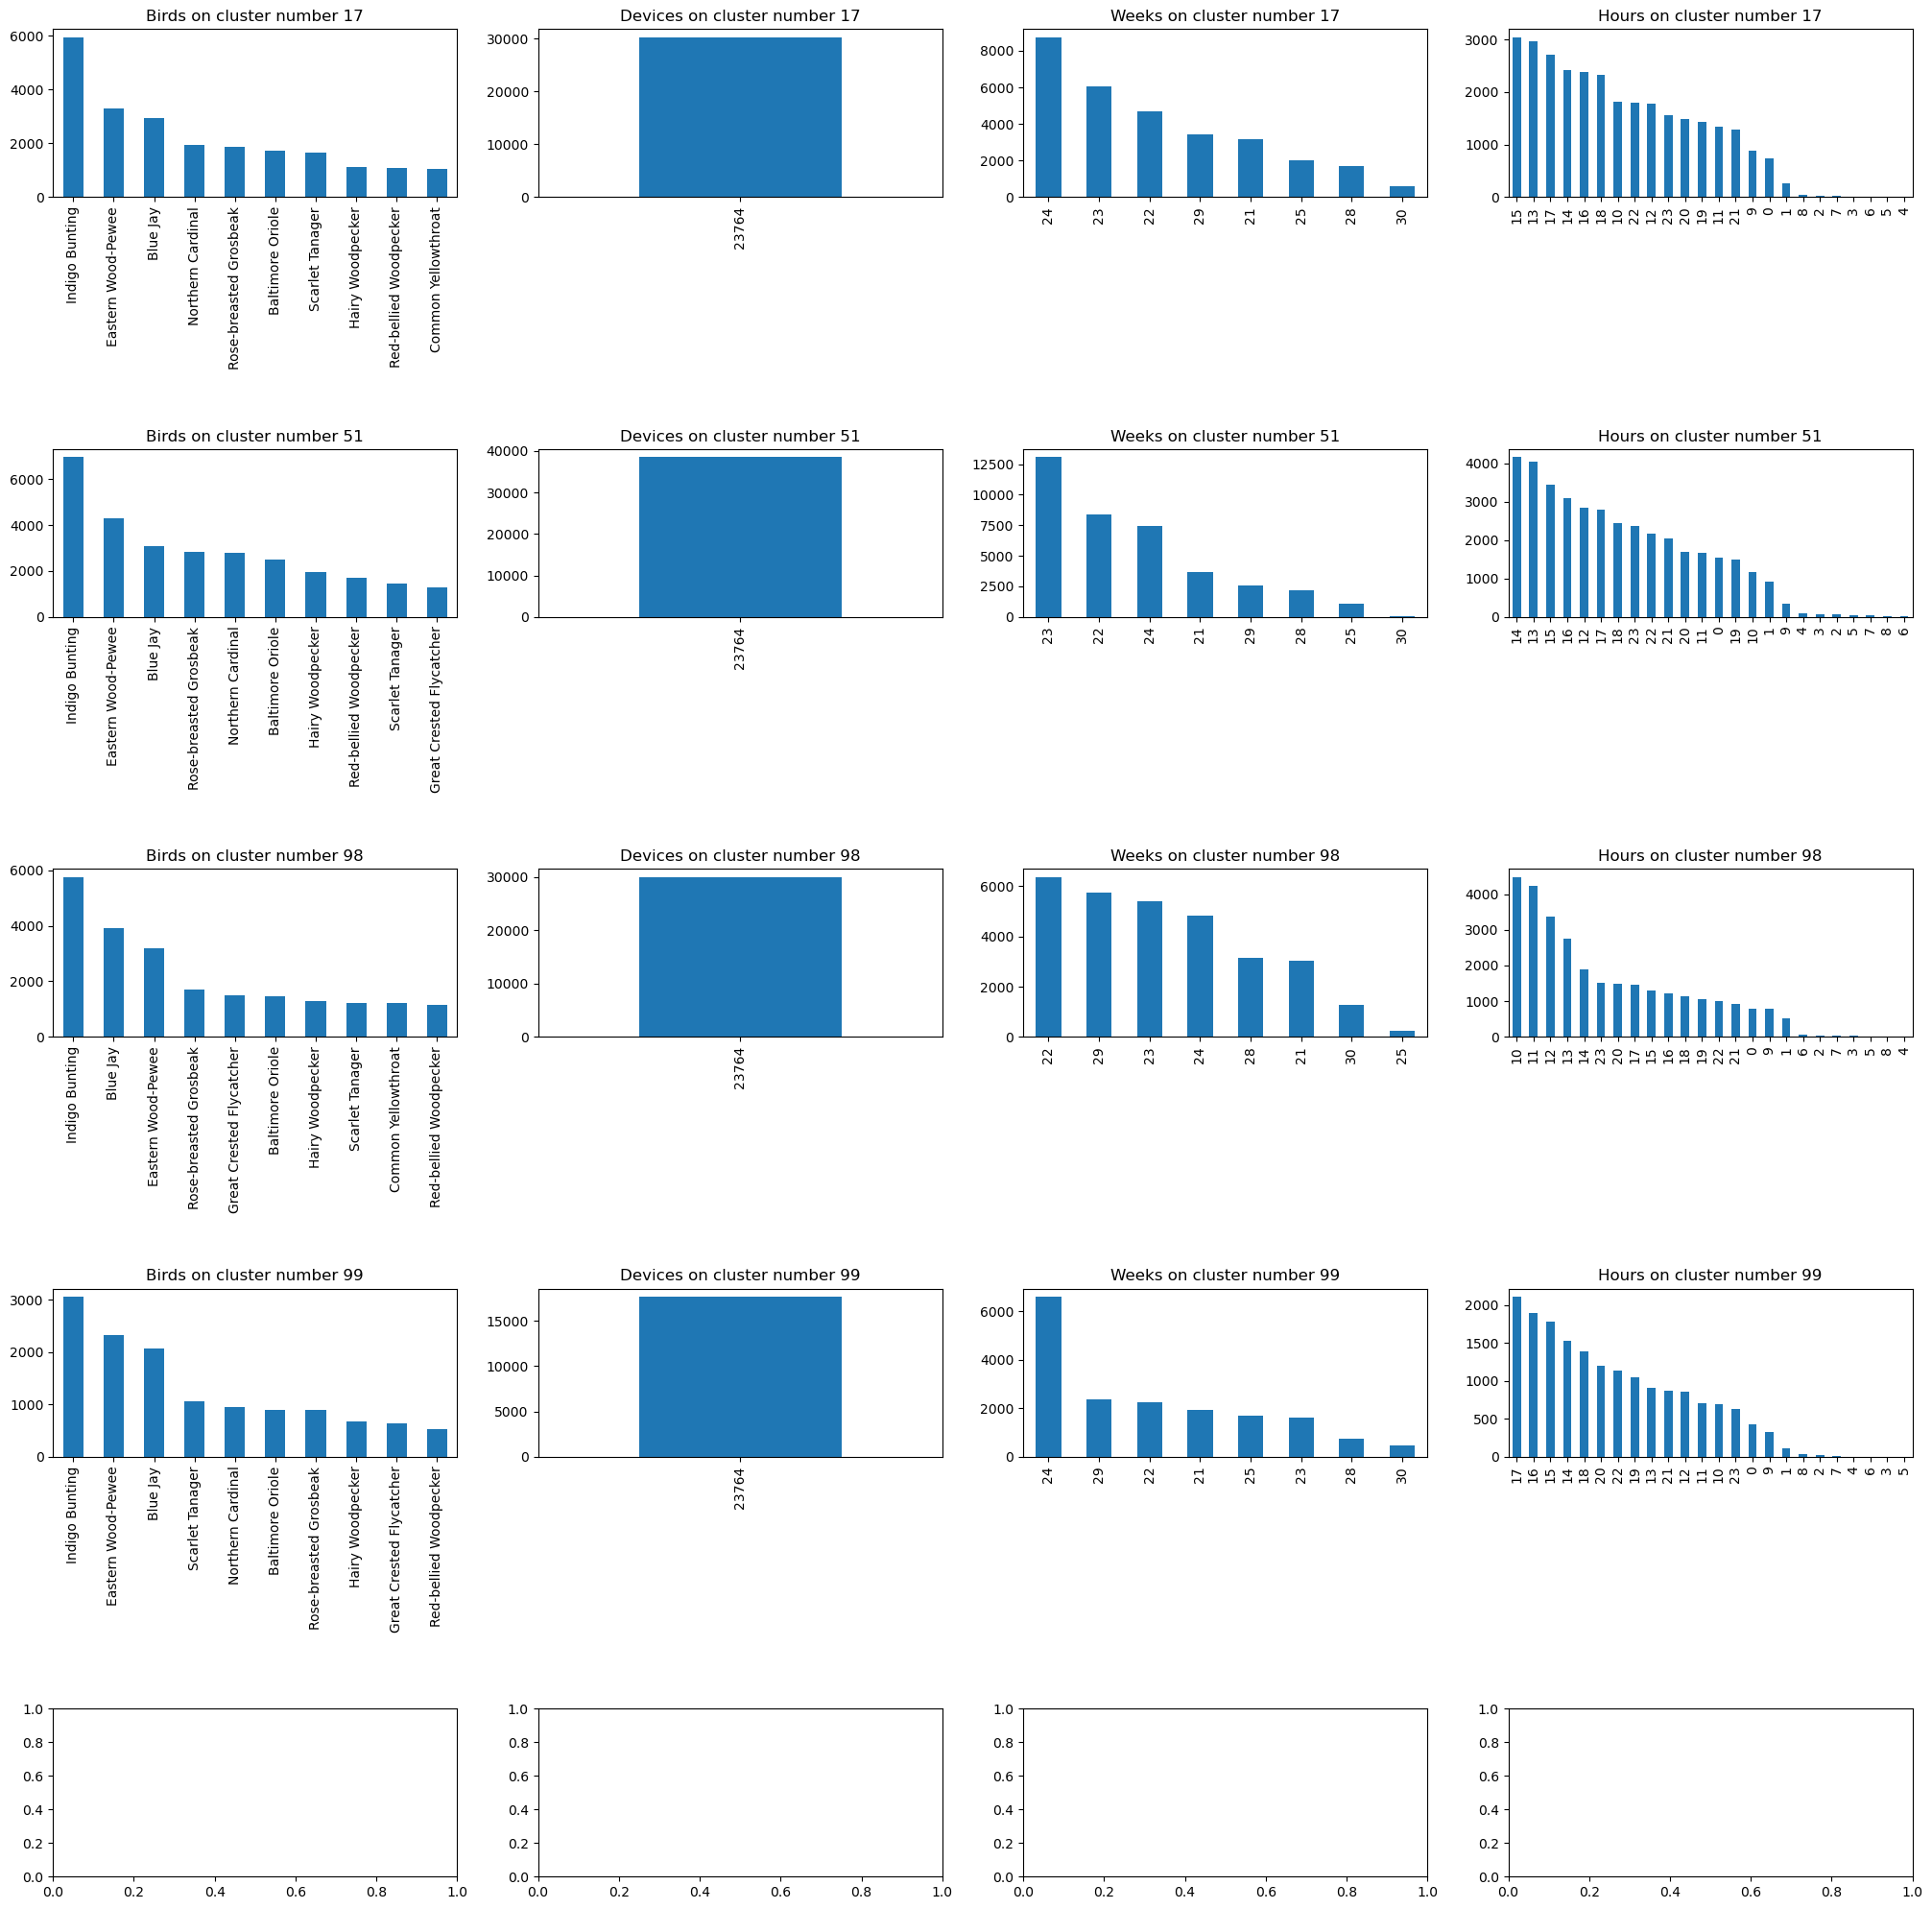

In [20]:
nrows=5
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(25, nrows*5))
for k, label in enumerate(relevant_clusters):
    if k < nrows:
        samples = data[data['labels']==label]
        #samples = samples[samples['confidence']>0.5]
        samples = samples[samples['detection']!='No detection']
        #print(k)
        #print(label)
        samples.detection.value_counts()[0:10].plot.bar(ax=axes[k, 0])
        samples.device.value_counts().plot.bar(ax=axes[k,1])
        samples.week.value_counts().plot.bar(ax=axes[k,2])
        samples.hour.value_counts().plot.bar(ax=axes[k,3])

        
        axes[k, 0].set_title("Birds on cluster number " + str(label))
        axes[k, 1].set_title("Devices on cluster number " + str(label))
        axes[k, 2].set_title("Weeks on cluster number " + str(label))
        axes[k, 3].set_title("Hours on cluster number " + str(label))

fig.subplots_adjust(hspace=1.50)

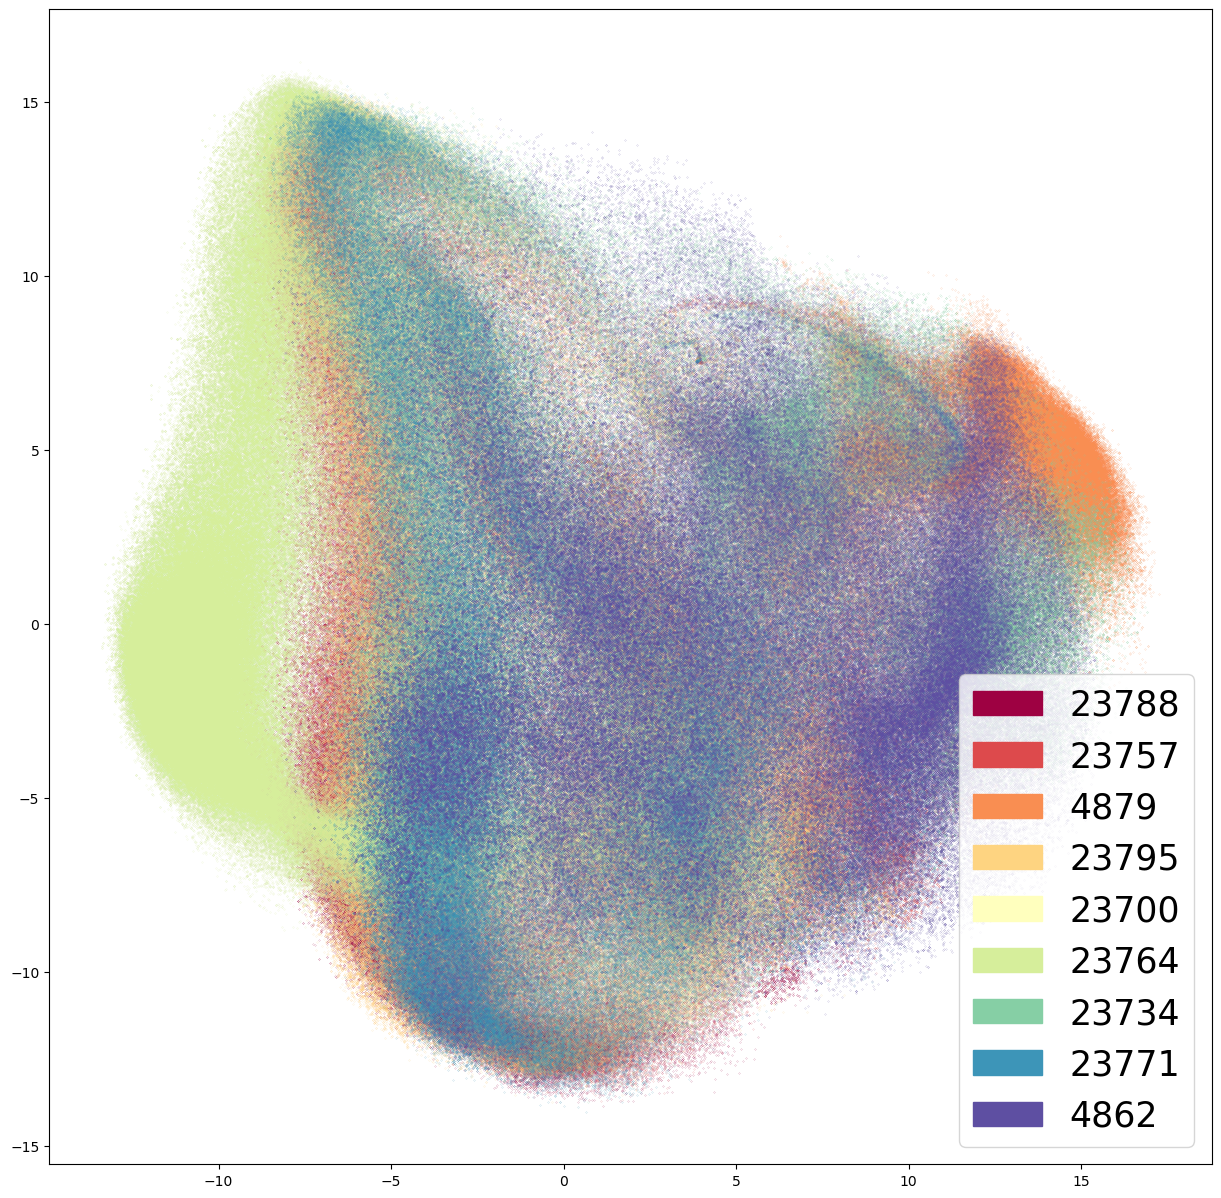

In [49]:
#data1=data[data['detection']!='No detection']
data1=data
# Black removed and is used for noise instead.
column = 'device'
labels = data1[column]
f_embedded = np.transpose(np.array([data1['x'], data1['y']]))
unique_labels = set(data1[column])
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[labels != -1] = True
n_noise_points = list(labels).count(-1)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
patches=[]
for k, col in zip(unique_labels, colors):
    #print('Color ', col)
    #print('Label ', k)

    class_member_mask = labels == k
    xy = f_embedded[class_member_mask & core_samples_mask]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col,
        markersize=0.1,
    )

    patch = mpatches.Patch(color=col, label=k)
    patches.append(patch)

ax.legend(handles=patches, fontsize="25")

fig.set_size_inches(15, 15)